In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import pinv
from scipy.stats import ttest_1samp
from sklearn.linear_model import Ridge, LinearRegression

....................................................................................................

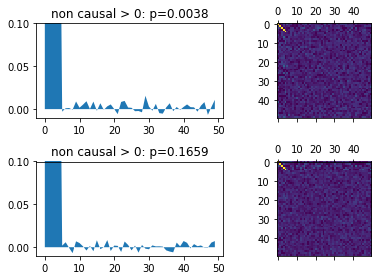

In [2]:
E_sklearn = list()
E_numpy = list()
for repeat in range(100):
    print('.', end='')
    
    # make data
    n = 1000  # number of samples
    nX = 50  # dimensionality of X

    Cx = np.random.randn(nX, nX)
    Cx = Cx.dot(Cx.T) / nX  # sym pos-semidefin
    X = np.random.multivariate_normal(np.zeros(nX), Cx, n)
    N = np.random.randn(n, nX)
    Y = X + N
    
    E = np.eye(nX)
    E[5:] = 0
    Y = X @ E + N
    
    # JRR
    set1, set2 = range(n//2), range(n//2, n)
    G = LinearRegression(fit_intercept=False)
    G.fit(Y[set1], X[set1])
    
    # Use sklearn to compute YG
    YG = G.predict(Y)
    H = Ridge(alpha=1., fit_intercept=False)
    E_hat = H.fit(X[set2], YG[set2]).coef_
    E_sklearn.append(E_hat)
    
    # Manually compute YG
    YG = Y @ G.coef_
    H = Ridge(alpha=1., fit_intercept=False)
    E_hat = H.fit(X[set2], YG[set2]).coef_
    
    # store coefs
    E_numpy.append(E_hat)

E_sklearn = np.mean(E_sklearn, 0)
E_numpy = np.mean(E_numpy, 0)

# plot
fig, axes = plt.subplots(2, 2)
for E_hat, (ax1, ax2) in zip((E_sklearn, E_numpy), axes):
    ax1.fill_between(range(len(E)), np.diag(E_hat))
    not_causal = np.where(np.diag(E)==0)[0]
    _, p_value = ttest_1samp(np.diag(E_hat)[not_causal], 0)
    ax1.set_title('non causal > 0: p=%.4f' % p_value)
    ax1.set_ylim(-.01, .1)
    ax2.matshow(E_hat, vmin=-.01, vmax=.1)
fig.tight_layout()